In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('mobile_price.csv')

In [4]:
df=pd.DataFrame(data)

In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='count'>

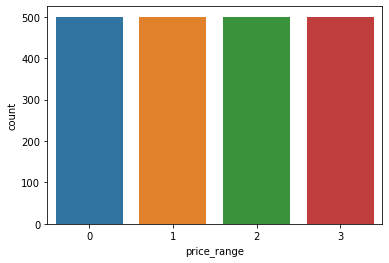

In [14]:
sns.countplot(df['price_range'])

In [28]:
corr=df.corr()

<AxesSubplot:>

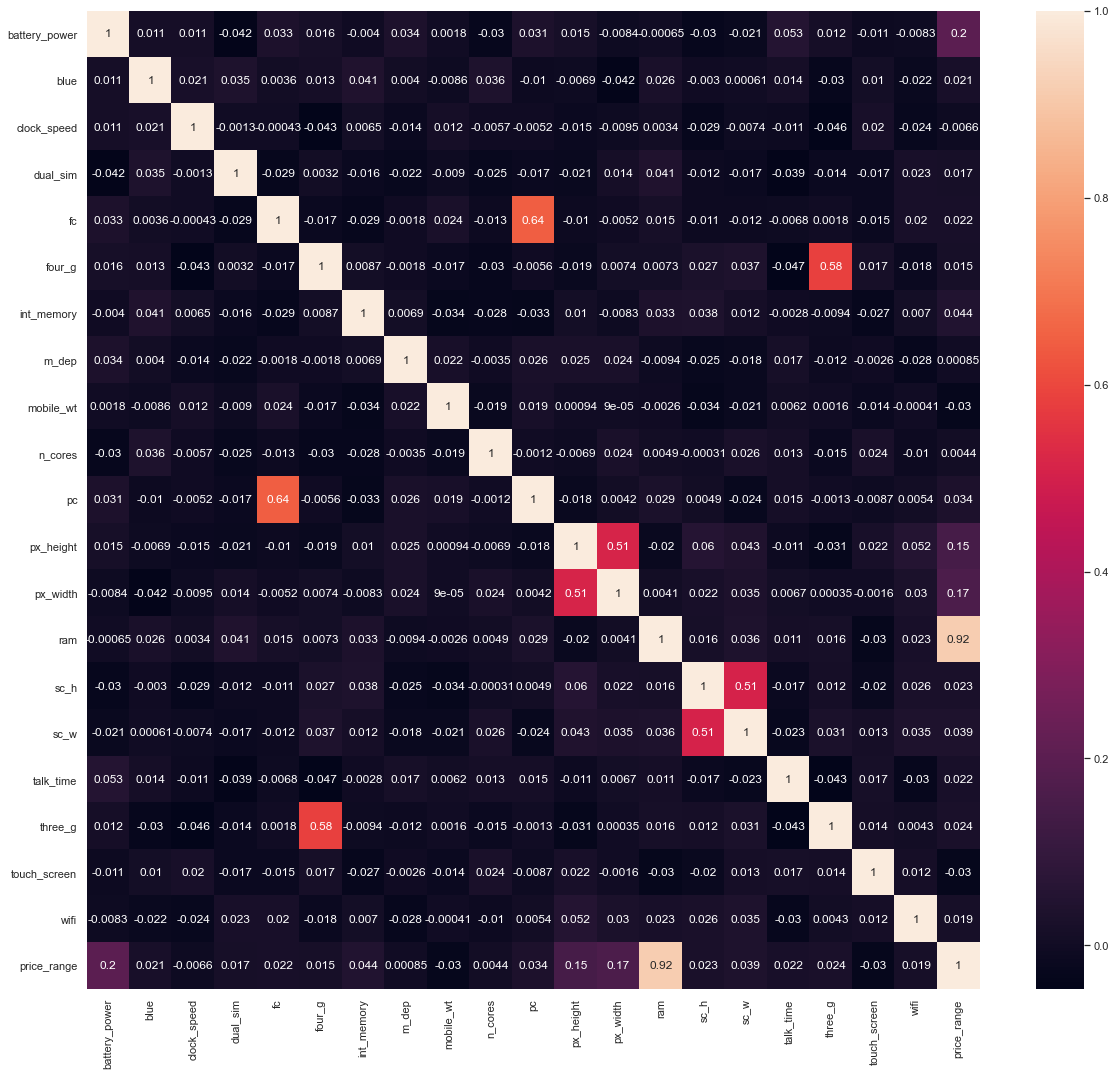

In [30]:
sns.set()
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True)

In [31]:
high_corr = df.corr()

In [34]:
high_corr_features = high_corr.index[abs(high_corr['price_range']) > 0.5]

In [35]:
high_corr_features

Index(['ram', 'price_range'], dtype='object')

In [36]:
len(high_corr_features)

2

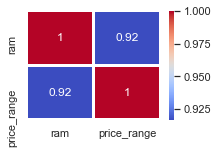

In [40]:
# heatmap
plt.figure(figsize=(3,2))
ax = sns.heatmap(data=df[high_corr_features].corr(), cmap='coolwarm', annot=True, linewidths=2)

In [48]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [52]:
feature_cols=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [11]:
#Feature Columns and Traget Variable
X=df.drop(columns=['price_range'],axis=1)
y=df['price_range']

In [12]:
#Splitting the Dataset into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [13]:
x_train.shape

(1600, 20)

In [15]:
x_test.shape

(400, 20)

In [16]:
y_train.shape

(1600,)

In [17]:
y_test.shape

(400,)

In [20]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [21]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [22]:
#Buliding Naive_Bayes Model
nb=GaussianNB()

In [23]:
nb.fit(x_train,y_train)

GaussianNB()

In [24]:
y_train_pred=nb.predict(x_train)
y_test_pred=nb.predict(x_test)

In [25]:
print("Train Data")
print(metrics.classification_report(y_train,y_train_pred))
print("test Data")
print(metrics.classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       413
           1       0.73      0.73      0.73       400
           2       0.71      0.72      0.71       384
           3       0.90      0.90      0.90       403

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.82      0.81      0.82      1600

test Data
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        87
           1       0.68      0.71      0.70       100
           2       0.78      0.65      0.71       116
           3       0.88      0.90      0.89        97

    accuracy                           0.79       400
   macro avg       0.79      0.80      0.80       400
weighted avg       0.79      0.79      0.79       400



In [41]:
### Training our Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(n_estimators=100,max_depth = 5)
clf.fit(x_train,y_train)
y_predict_train = clf.predict(x_train)
y_predict_test = clf.predict(x_test)
print('Train: ')
print(metrics.classification_report(y_train,y_predict_train))
print('Test: ')
print(metrics.classification_report(y_test,y_predict_test))

Train: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       413
           1       0.83      0.86      0.85       400
           2       0.90      0.80      0.85       384
           3       0.96      1.00      0.98       403

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600

Test: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        87
           1       0.73      0.76      0.75       100
           2       0.87      0.68      0.76       116
           3       0.91      0.94      0.92        97

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.83      0.83       400



In [43]:
param={'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        'max_features':['auto', 'sqrt'],
        'min_samples_split':[2, 5, 10],
       'min_samples_leaf':[1, 2, 4],
       'max_depth':[3,5,7,10],
       
      }
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_depth': [3, 5, 7, 10]}


In [46]:
grid=GridSearchCV(estimator =clf, param_grid=param, cv = 3, verbose=2, n_jobs = -1)

In [47]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 50.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=2)

In [49]:
grid.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
rf=RandomForestClassifier(n_estimators=200,max_depth =10,max_features='auto',min_samples_leaf=1,min_samples_split=2)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [51]:
y_predict_train = rf.predict(x_train)
y_predict_test = rf.predict(x_test)
print('Train: ')
print(metrics.classification_report(y_train,y_predict_train))
print('Test: ')
print(metrics.classification_report(y_test,y_predict_test))

Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

Test: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        87
           1       0.83      0.83      0.83       100
           2       0.87      0.79      0.83       116
           3       0.93      0.91      0.92        97

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.87      0.88      0.87       400



In [53]:
# Print the name and gini importance of each feature
for feature in zip(feature_cols, clf.feature_importances_):
    print(feature)

('battery_power', 0.075342742964157)
('blue', 0.0017368186222104691)
('clock_speed', 0.012216538405684187)
('dual_sim', 0.0018512822032250701)
('fc', 0.01223215266142468)
('four_g', 0.0016362549893325898)
('int_memory', 0.023360033824597393)
('m_dep', 0.009862500782730856)
('mobile_wt', 0.023932179523311746)
('n_cores', 0.008728813138391188)
('pc', 0.012716783738135427)
('px_height', 0.04500335284093811)
('px_width', 0.049300231436429816)
('ram', 0.672710125804094)
('sc_h', 0.010825061845604228)
('sc_w', 0.018200727441643357)
('talk_time', 0.01337163231835018)
('three_g', 0.0012293307834826581)
('touch_screen', 0.0035592845842728578)
('wifi', 0.002184152091984382)


Identify And Select Most Important Features

In [56]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5), threshold=0.15)

In [57]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feature_cols[feature_list_index])

ram


Create A Data Subset With Only The Most Important Features

In [58]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

Train A New Random Forest Classifier Using Only Most Important Features

In [64]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=200, random_state=123, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=123)

Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier

In [65]:
y_predict_train = clf_important.predict(X_important_train)
y_predict_test = clf_important.predict(X_important_test)
print('Train: ')
print(metrics.classification_report(y_train,y_predict_train))
print('Test: ')
print(metrics.classification_report(y_test,y_predict_test))

Train: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       413
           1       0.91      0.94      0.92       400
           2       0.93      0.90      0.92       384
           3       0.95      0.97      0.96       403

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

Test: 
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        87
           1       0.54      0.56      0.55       100
           2       0.57      0.48      0.52       116
           3       0.75      0.79      0.77        97

    accuracy                           0.66       400
   macro avg       0.66      0.67      0.66       400
weighted avg       0.65      0.66      0.65       400



As can be seen by the accuracy scores, our original model which contained all four features is 83% accurate while the our ‘limited’ model which contained only two features is 66% accurate. Thus, for a small cost in accuracy we halved the number of features in the model.